In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cerebral-stroke-predictionimbalaced-dataset/dataset.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("../input/cerebral-stroke-predictionimbalaced-dataset/dataset.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


**Let's see whether the data is balanced or imbalanced****

In [4]:
print(df['stroke'].value_counts())
print('***'*30)
print(df.shape)
print('***'*30)
print(df.isna().sum())
# data is imbalanced
# bmi and smoking status have null values

0    42617
1      783
Name: stroke, dtype: int64
******************************************************************************************
(43400, 12)
******************************************************************************************
id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64


In [5]:
print("percentage of missing values in bmi :: ",round(df['bmi'].isna().sum()/len(df['bmi'])*100,2))
print("percentage of missing values in Smoking Status :: ",round(df['smoking_status'].isna().sum()/len(df['smoking_status'])*100,2))

# we will drop smoking status as huge no.of values are missing , even if we fill it may  effect
# the integrity of the data

df.drop(columns=['smoking_status'],axis=1,inplace=True)
print(df.shape)

percentage of missing values in bmi ::  3.37
percentage of missing values in Smoking Status ::  30.63
(43400, 11)


########
* Since bmi only have 3.37 % percent of missing values we will fill it with the new appropriate value.
* it can be either 
1. mean
2. median 
3. mode
* which one to consider ????
* well it depends on the dataset whether i.e whether that column has outliers or not.
* for more information refer to this GREAT ARTICLE (will take just 10 min to get you through)

here --> https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


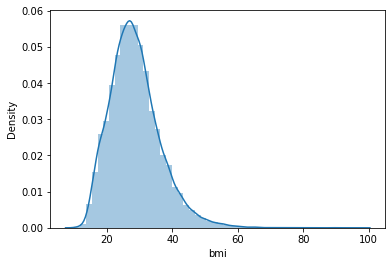

0.8987282500249906


In [6]:
sns.distplot(df['bmi'])
plt.show()
print(df['bmi'].skew())

 **A skewness value greater than 1 or less than -1 indicates a highly skewed distribution. A value between 0.5 and 1 or -0.5 and -1 is moderately skewed. A value between -0.5 and 0.5 indicates that the distribution is fairly symmetrical.**
 
 So df['bmi'] is moderately skewed.
 Hence w cannot use mean value to fill null values in df['bmi'], we can use either median(used only for numeric data) or mode(can be used for both numeric as well as categorical)
 We may play around data and can see which works better (median or mode)
 i'll go with median now....

In [7]:
df['bmi'].fillna(df['bmi'].median(),inplace=True)
print(df['bmi'].isna().sum())

0


Now we will remove ouliers in the data. We will do it before plotting correlation heatmap and applying feature scaling as they both can be affected by outliers  (excluding Robust Scaling,find out why outliers won't have an effect on robust Scaling).

In [8]:
print(df.columns)
print('***'*20)
print(df.describe())

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'stroke'],
      dtype='object')
************************************************************
                 id           age  hypertension  heart_disease  \
count  43400.000000  43400.000000  43400.000000   43400.000000   
mean   36326.142350     42.217894      0.093571       0.047512   
std    21072.134879     22.519649      0.291235       0.212733   
min        1.000000      0.080000      0.000000       0.000000   
25%    18038.500000     24.000000      0.000000       0.000000   
50%    36351.500000     44.000000      0.000000       0.000000   
75%    54514.250000     60.000000      0.000000       0.000000   
max    72943.000000     82.000000      1.000000       1.000000   

       avg_glucose_level           bmi        stroke  
count       43400.000000  43400.000000  43400.000000  
mean          104.482750     28.574551      0.018041  
s

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


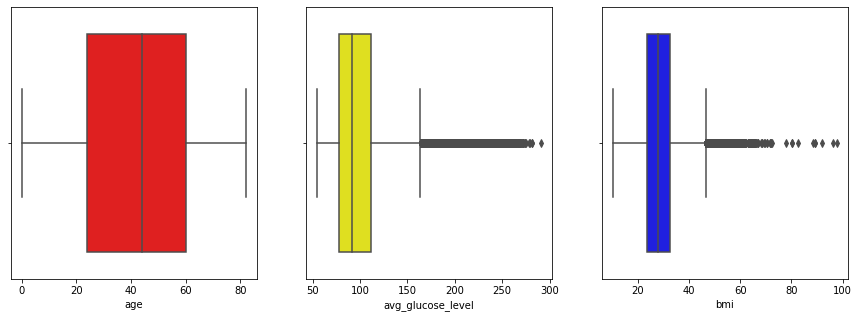

In [9]:
f,ax=plt.subplots(1,3,figsize=(15,5))
sns.boxplot(df['age'],color='red',ax=ax[0])
sns.boxplot(df['avg_glucose_level'],color='yellow',ax=ax[1])
sns.boxplot(df['bmi'],color='blue',ax=ax[2])
plt.show()

## bmi and avg glucose level have valid ranges , should i still remove them ??????????

In [10]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'stroke'],
      dtype='object')

In [11]:
q1=df['avg_glucose_level'].quantile(0.25)
q3=df['avg_glucose_level'].quantile(0.75)
iqr=q3-q1
lower=q1-3*iqr
upper=q3+3*iqr

print(q1," ",iqr)

# no of extreemmmme outliers
print(df[(df['avg_glucose_level']<lower) | (df['avg_glucose_level']>upper)].shape)
print("before removing Outliers",df.shape)

print('***'*20)


# removing extremmme outliers
df=df[(df['avg_glucose_level']>=lower) & (df['avg_glucose_level']<=upper)]
print("after removing Outliers",df.shape)

# removing mild + extremmme outliers
new_df=df[(df['avg_glucose_level']>=q1-1.5*iqr) & (df['avg_glucose_level']<=q1+1.5*iqr)]

77.54   34.52999999999999
(1865, 11)
before removing Outliers (43400, 11)
************************************************************
after removing Outliers (41535, 11)


In [12]:
q1=df['bmi'].quantile(0.25)
q3=df['bmi'].quantile(0.75)
iqr=q3-q1
lower=q1-3*iqr
upper=q3+3*iqr

print(q1," ",iqr)

# no of extreemmmme outliers
print(df[(df['bmi']<lower) | (df['bmi']>upper)].shape)

df=df[(df['bmi']>=lower)&(df['bmi']<=upper)]

# removing mild + extremmme outliers
new_df=new_df[(new_df['bmi']>=q1-1.5*iqr) & (new_df['bmi']<=q1+1.5*iqr)]

23.2   9.2
(82, 11)


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


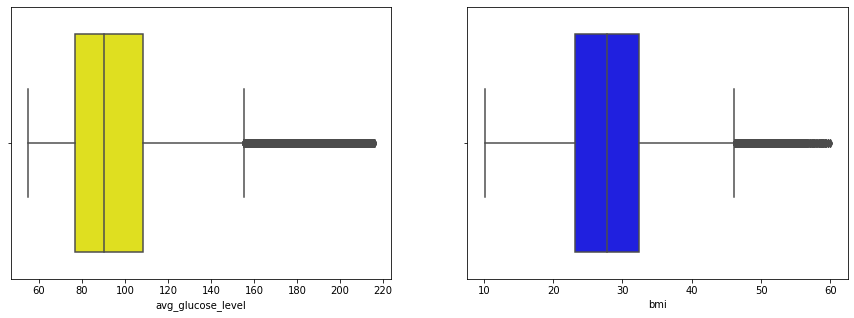

In [13]:
fig,ax=plt.subplots(1,2,figsize=(15,5),sharey=True)
sns.boxplot(df['avg_glucose_level'],color='yellow',ax=ax[0])
sns.boxplot(df['bmi'],color='blue',ax=ax[1])
plt.show()

##########
* Now we will do encoding of categorical features*
* Label Encoding and Ordinal Encoding
> Label Encoding :=  Red is 1, blue is 2, and yellow is 3

> Ordinal Encoding := excellent is 5 , very good is 4 , good is 3 etc

> One Hot Encoding := blue   : red =0 yellow =0 blue=1 ( 3 new columns)
                   := red    : red =1 yellow =0 blue=0
                   := yellow : red =0 yellow =1 blue=0

I reffered this article --> https://towardsdatascience.com/categorical-feature-encoding-547707acf4e5#:~:text=6.-,Label%20Encoding%20and%20Ordinal%20Encoding,unique%20value%20in%20a%20feature.
Give it a thumbs up if you like it

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label_encoded_df = df.copy()

print(label_encoded_df.select_dtypes(include='O').columns)

for col in label_encoded_df.select_dtypes(include='O').columns:
    label_encoded_df[col]=le.fit_transform(label_encoded_df[col])
label_encoded_df.head()

Index(['gender', 'ever_married', 'work_type', 'Residence_type'], dtype='object')


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
0,30669,1,3.0,0,0,0,4,0,95.12,18.0,0
1,30468,1,58.0,1,0,1,2,1,87.96,39.2,0
2,16523,0,8.0,0,0,0,2,1,110.89,17.6,0
3,56543,0,70.0,0,0,1,2,0,69.04,35.9,0
4,46136,1,14.0,0,0,0,1,0,161.28,19.1,0


In [15]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,0


###################
* *Now we will plot a heat map of correlation * why?
> if we had a lot of columns(like above 50) it would have helped us in select most important features only.But if all those features were important we would rather apply regularization parameter or 'PCA'. Explore these two things by your own in order to get that answer of why.
* But , here we don't have that many features , then why correlation , it may still help us to know or discover insights of how a feature which we can't think of having any relation with target variable may be having a unimaginary impact over it.
 

Since our data contains categorical(feature) vs categorical(target) and numeric(feature) vs categorical(target) we can't use correlation here to specify relation among them (but spearson correlation is used in such scenerios , i'll let you know once i go through this concept,will edit in future)
 > refer --> https://stats.stackexchange.com/questions/256344/why-is-correlation-not-very-useful-when-one-of-the-variables-is-categorical
 
 Note :: Correlation should be applied over balanced data only , applying on imbalanced data will make our result in wrong relation value as it will be biased towards some particular feature values.
 
 
 My notebook is having problem to run from down onwards, but i'll make sure to provide answers to your why and how ......

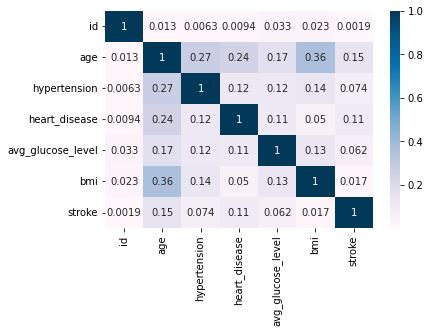

In [16]:
## but still showing how we make correlation matrix (although not a right approach)
correlation=df.corr()
sns.heatmap(correlation,annot=True,cmap='PuBu',fmt=".2g",)
plt.show()

In [17]:
print(len(df.columns))
print(df.columns)
print(df.head())

11
Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'stroke'],
      dtype='object')
      id  gender   age  hypertension  heart_disease ever_married  \
0  30669    Male   3.0             0              0           No   
1  30468    Male  58.0             1              0          Yes   
2  16523  Female   8.0             0              0           No   
3  56543  Female  70.0             0              0          Yes   
4  46136    Male  14.0             0              0           No   

      work_type Residence_type  avg_glucose_level   bmi  stroke  
0      children          Rural              95.12  18.0       0  
1       Private          Urban              87.96  39.2       0  
2       Private          Urban             110.89  17.6       0  
3       Private          Rural              69.04  35.9       0  
4  Never_worked          Rural             161.28  19.1       0  


CAN WE APPLY CHI SQUARE TEST ON IMBALANCED DATA ??????????

which alapha value to select ??????

In [18]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# separate independent & dependent variables
X = label_encoded_df.iloc[:,0:11]  #independent columns
y = label_encoded_df.iloc[:,-1]    #target column i.e price range

# # apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
cols=pd.DataFrame(X.columns[fit.get_support()])
pval=pd.DataFrame(np.round(fit.pvalues_,3))
k=pd.concat([dfscores,cols,pval],axis=1)
k.columns=['Fscore','features','p_values']
print(k)
# print(k.sort_values(by='Fscore',ascending=False))
dfscores = pd.DataFrame
print(X.columns[fit.get_support()])
print(type(fit))
# print(fit.pvalues_)

# 0.05  0.10

          Fscore           features  p_values
0    1784.872642                 id     0.000
1       2.302022             gender     0.129
2   11838.481255                age     0.000
3     209.784008       hypertension     0.000
4     438.130999      heart_disease     0.000
5      76.354606       ever_married     0.000
6       2.115939          work_type     0.146
7       0.358405  avg_glucose_level     0.549
8    1925.323420                bmi     0.000
9      21.761776             stroke     0.000
10  40766.000000                NaN     0.000
Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'avg_glucose_level', 'bmi', 'stroke'],
      dtype='object')
<class 'sklearn.feature_selection._univariate_selection.SelectKBest'>


In [19]:
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,0


***Here we will divide data set in such a way that ratio of True/False in train should be equals to True/False ratio in test set as our data is imbalanced and we need to test and train in every kind of example, for this purpose we will use stratified K-Fold*.**

In [20]:
from sklearn.model_selection import train_test_split ,KFold, StratifiedKFold

ss=StratifiedKFold()

for train_index, test_index in ss.split(X,y):
    x_train=X.iloc[train_index]
    y_train=y.iloc[train_index]
    x_test=X.iloc[test_index]
    y_test=y.iloc[test_index]

    
print(x_train.head())
    
    ## why "X.loc[]" not working

# x_train,y_train,x_test,y_test=train_test_split(X,y,)

      id  gender   age  hypertension  heart_disease  ever_married  work_type  \
0  30669       1   3.0             0              0             0          4   
1  30468       1  58.0             1              0             1          2   
2  16523       0   8.0             0              0             0          2   
3  56543       0  70.0             0              0             1          2   
4  46136       1  14.0             0              0             0          1   

   Residence_type  avg_glucose_level   bmi  stroke  
0               0              95.12  18.0       0  
1               1              87.96  39.2       0  
2               1             110.89  17.6       0  
3               0              69.04  35.9       0  
4               0             161.28  19.1       0  


even after stratifying our data,it doesn't change the fact that we still have examples highly imbalanced in our training data. And we need enough no. of examples of each class(True/False or 0/1)
to train our model on it.So for that purpose we can use Two techniques

1. UnderSampling techniques 
2. OverSampling techniques

I'll use one of the oversampling techniques known as SOMETETOmek.(Synthetic Minority Oversampling Technique or SMOTE). It will basically generate more minority classes of similar kinds i.e vectors near to minority class vectors. We should avoid using undersampling techniques as it will lead to huge loss of information.

For more info refer this article : https://towardsdatascience.com/imbalanced-classification-in-python-smote-tomek-links-method-6e48dfe69bbc

To get overall idea of techniques (not much into details) : YouTube KrisNaik videos https://www.youtube.com/watch?v=pDw_JHHvj-0&t=3189s

 ## Over sampling the x_train,y_train using Somet

In [21]:
from imblearn.combine import SMOTETomek

sm=SMOTETomek(random_state=42)
x_res,y_res=sm.fit_resample(x_train,y_train)

print(x_train.shape)
print(x_res.shape)

(33163, 11)
(63702, 11)


Now we will try to find the best model from various classification models, then we will find the best 
parameters of those models using cross_val_score and gridSearchCV.

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

classifiers={'Logistic regression':LogisticRegression(),
             'KNearest':KNeighborsClassifier(),
            }

In [23]:
from sklearn.model_selection import cross_val_score

for key , clf in classifiers.items():
    clf.fit(x_res,y_res)
    training_score=cross_val_score(clf,x_res,y_res,cv=5)
    print("Classifiers: ", clf, " Has a training score of",
          round(training_score.mean(), 2) * 100, "% accuracy score")

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Classifiers:  LogisticRegression()  Has a training score of 94.0 % accuracy score
Classifiers:  KNeighborsClassifier()  Has a training score of 89.0 % accuracy score


In [24]:
from sklearn.model_selection import GridSearchCV

log_reg_param ={ 'penalty':['l2'],'C':[0.001,0.01,0.1,1,10,100,1000]}
grid_log_reg=GridSearchCV(LogisticRegression(),log_reg_param)

grid_log_reg.fit(x_res,y_res)

log_bp=grid_log_reg.best_estimator_

k_near_param={'n_neighbors':list(range(2,5,1)),'algorithm':['auto','ball_tree','kd_tree','brute']}
grid_k=GridSearchCV(KNeighborsClassifier(),k_near_param)

grid_k.fit(x_res,y_res)

k_bp=grid_k.best_estimator_

# # svc_param={'C':[0.001,0.01,0.1,1,10],'kernel':['rbf','poly','sigmoid','linear']}

# # grid_svc=GridSearchCV(SVC(),svc_param)

# # grid_svc.fit(x_res,y_res)
# # svc_bp=grid_svc.best_estimators_

# decisionTree_param={'criterion':['gini','entropy'],'max_depth':list(range(2,4,1)),
#                     'min_sample_leaf':list(range(5,7,1))}

# grid_tree=GridSearchCV(DecisionTreeClassifier(),decisionTree_param)

# grid_tree.fit(x_res,y_res)

# tree_bp=grid_tree.best_estimators_

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


**Should choose best estimator among these models using validation set**

In [25]:
log_reg_score=cross_val_score(log_bp,x_res,y_res,cv=5)
print('Score for Logistic Regression param ',round(log_reg_score.mean() * 100, 2).astype(str) + '%')

k_score=cross_val_score(k_bp,x_res,y_res,cv=5) 

print('Score for KNeighbors param ',round(k_score.mean() * 100, 2).astype(str) + '%')
# # svc_score=cross_val_score(svc_bp,x_res,y_res,cv=5)
# # print('Score for svc param ',round(svc.mean() * 100, 2).astype(str) + '%')

# tree_score=cross_val_score(tree_bp,x_res,y_res,cv=5)
# print('Score for tree param ',round(tree_score.mean() * 100, 2).astype(str) + '%')

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Score for Logistic Regression param  95.74%
Score for KNeighbors param  91.2%


CROSS_VAL_SCORE VS CROSS_VAL_PRED

https://www.quora.com/In-scikit-learn-What-is-the-difference-between-cross_val_predict-and-cross_val_score

In [26]:
print(x_res.shape)
print(y_res.shape)
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1,estimator2,X,Y,ylim=None,cv=None,n_jobs=1,
                        train_sizes=np.linspace(0.1,1.0,5)):
    f,(ax1,ax2)=plt.subplots(1,2,figsize=(20,14),sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    
    train_sizes,train_scores,test_scores=learning_curve(
    estimator1,x_res,y_res,cv=cv,n_jobs=n_jobs,train_sizes=train_sizes)
    
    print(train_sizes,'**********************')
    
    train_scores_mean=np.mean(train_scores,axis=1)
    train_scores_std=np.std(train_scores,axis=1)
    test_scores_mean=np.mean(test_scores,axis=1)
    test_scores_std=np.std(test_scores,axis=1)
    
    print(train_scores_mean,'*********************')
    print('train_scores ---> ',train_scores)
    
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff" )
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, x_res, y_res, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    # Third Estimator
#     train_sizes, train_scores, test_scores = learning_curve(
#         estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
#     train_scores_mean = np.mean(train_scores, axis=1)
#     train_scores_std = np.std(train_scores, axis=1)
#     test_scores_mean = np.mean(test_scores, axis=1)
#     test_scores_std = np.std(test_scores, axis=1)
#     ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                      train_scores_mean + train_scores_std, alpha=0.1,
#                      color="#ff9124")
#     ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                      test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
#     ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
#              label="Training score")
#     ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
#              label="Cross-validation score")
#     ax3.set_title("Support Vector Classifier \n Learning Curve", fontsize=14)
#     ax3.set_xlabel('Training size (m)')
#     ax3.set_ylabel('Score')
#     ax3.grid(True)
#     ax3.legend(loc="best")
    
     # Fourth Estimator
#     train_sizes, train_scores, test_scores = learning_curve(
#         estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
#     train_scores_mean = np.mean(train_scores, axis=1)
#     train_scores_std = np.std(train_scores, axis=1)
#     test_scores_mean = np.mean(test_scores, axis=1)
#     test_scores_std = np.std(test_scores, axis=1)
#     ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                      train_scores_mean + train_scores_std, alpha=0.1,
#                      color="#ff9124")
#     ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                      test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
#     ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
#              label="Training score")
#     ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
#              label="Cross-validation score")
#     ax4.set_title("Decision Tree Classifier \n Learning Curve", fontsize=14)
#     ax4.set_xlabel('Training size (m)')
#     ax4.set_ylabel('Score')
#     ax4.grid(True)
#     ax4.legend(loc="best")
#     return plt

(63702, 11)
(63702,)


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[ 5096 16562 28028 39494 50961] **********************
[0.90407771 0.91190074 0.90201727 0.91452297 0.93106886] *********************
train_scores --->  [[0.93367347 0.92759027 1.         0.9344584  0.76766091 0.76452119
  0.9344584  0.92857143 0.93210361 0.93622449 0.93367347 0.99038462
  0.92857143 0.93367347 0.98802983 0.93975667 0.9411303  0.7760989
  0.93681319 0.77040816 0.93033752 0.96330455 0.92680534 0.93151491
  0.76864207 0.77413658 0.77845369 0.93347724 0.99803768 0.92974882
  0.93131868 0.93072998 0.92621664 0.92189953 0.93033752 0.92798273
  0.93151491 0.92641287 0.93602826 0.92248823 0.93112245 0.79199372
  0.93779435 0.93426217 0.84576138 0.99980377 0.77590267 0.92602041
  0.93799058 0.93072998 0.933281   0.78492936 0.76589482 0.7833595
  0.81789639 0.93171115 1.         0.93563579 0.93720565 0.92798273
  0.95231554 0.92621664 0.77394035 0.76746468 0.92680534 0.93190738
  0.99980377 0.89481947 0.93759812 0.93151491 0.93249608 0.93563579
  0.9733124  0.93524333 0.8765698

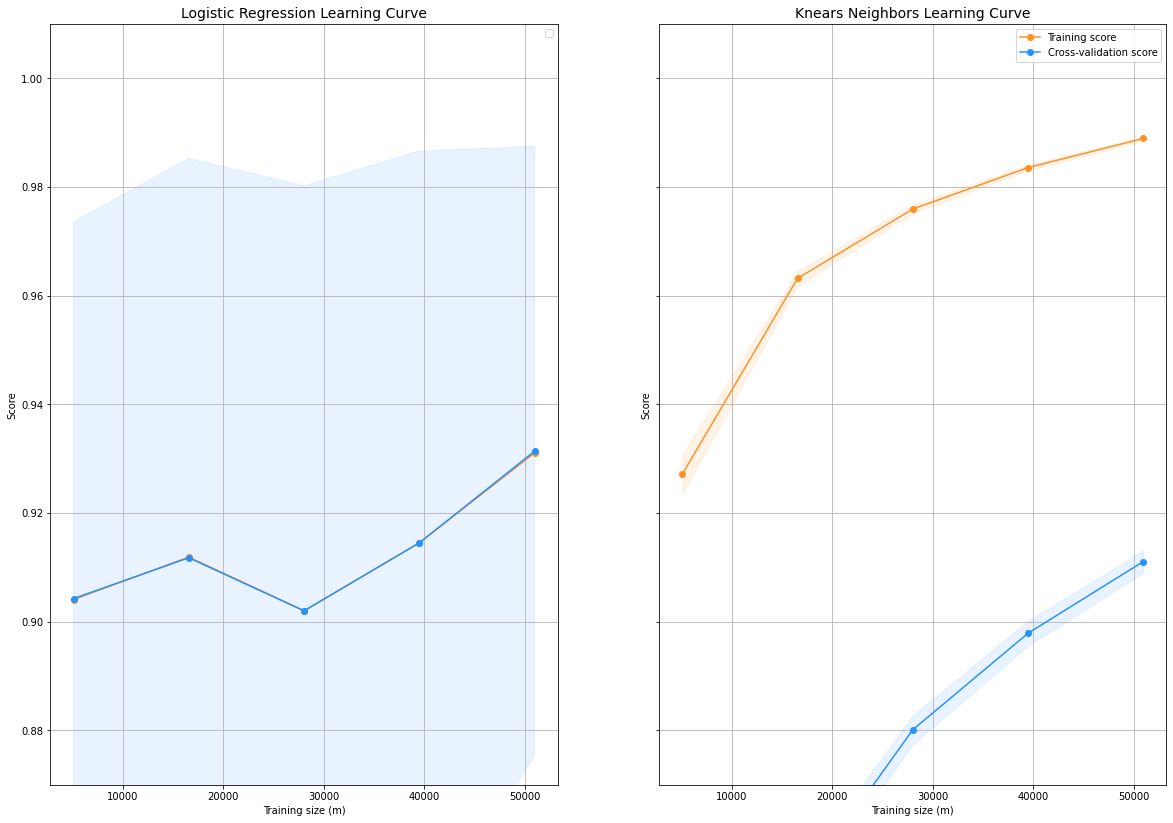

In [27]:
cv=ShuffleSplit(n_splits=100,test_size=0.2,random_state=42)
plot_learning_curve(log_bp,k_bp,x_res,y_res,(0.87,1.01),cv=cv,n_jobs=4,train_sizes=np.linspace(0.1,1.0,5))

# cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
# plot_learning_curve(log_reg, knears_neighbors, svc, tree_clf, X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)

In [28]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# Create a DataFrame with all the scores and the classifiers names.

log_reg_pred = cross_val_predict(log_bp, x_res, y_res, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(k_bp, x_res, y_res, cv=5)

# svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
#                              method="decision_function")

# tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [29]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_res, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_res, knears_pred))
# print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
# print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

Logistic Regression:  0.991214202823839
KNears Neighbors:  0.911965087438385


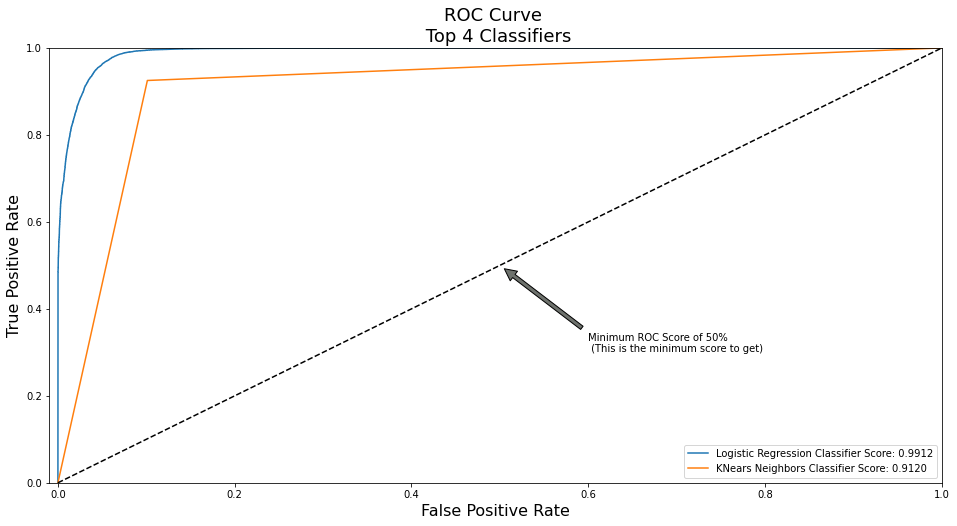

In [30]:
log_fpr, log_tpr, log_thresold = roc_curve(y_res, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_res, knears_pred)
# svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
# tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_res, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_res, knears_pred)))
#     plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
#     plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr)
plt.show()

NOTE *** 

As learning_curves tell us about whether our model underfit or overfit on our data , this technique is not useful in imbalanced data as having an imbalanced data will make our model to always overfit on majority class and it will just guess around on x_test .
Hence learning_curves are **NOT** ***beneficial on imbalanced data***
*

[Text(0, 0.5, ''), Text(0, 1.5, '')]

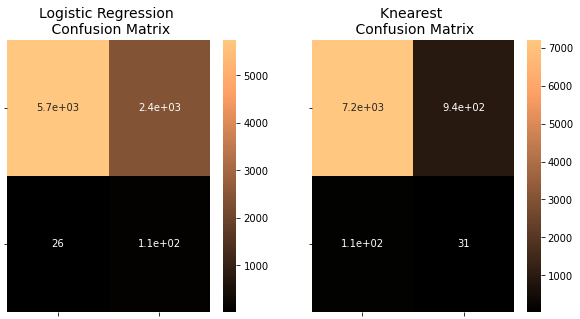

In [31]:
from sklearn.metrics import confusion_matrix

y_pred_log_reg = log_bp.predict(x_test)
y_pred_knear = k_bp.predict(x_test)

log_reg_cf=confusion_matrix(y_test,y_pred_log_reg)
kneighbours_cf=confusion_matrix(y_test,y_pred_knear)
 
fig,ax= plt.subplots(1,2,figsize=(10,5))

sns.heatmap(log_reg_cf, ax=ax[0], annot=True, cmap=plt.cm.copper)
ax[0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(kneighbours_cf, ax=ax[1], annot=True, cmap=plt.cm.copper)
ax[1].set_title("Knearest \n Confusion Matrix", fontsize=14)
ax[1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1].set_yticklabels(['', ''], fontsize=14, rotation=360)



In [32]:
print(x_test.shape)
df.shape

(8290, 11)


(41453, 11)

*** Don't follow anyone's notebook blindly , question why and how 
that's how learning goes ....

Refrences :

--> credit card fraud : https://www.kaggle.com/code/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets

-->cross_val_predict vs cross_val_score -->  https://www.quora.com/In-scikit-learn-What-is-the-difference-between-cross_val_predict-and-cross_val_score

-->SMOTEtomek in detail --> https://towardsdatascience.com/imbalanced-classification-in-python-smote-tomek-links-method-6e48dfe69bbc

Handling Imbalanced data(not much into details) : YouTube KrisNaik videos https://www.youtube.com/watch?v=pDw_JHHvj-0&t=3189s

--> https://stats.stackexchange.com/questions/256344/why-is-correlation-not-very-useful-when-one-of-the-variables-is-categorical
 
 --> https://towardsdatascience.com/categorical-feature-encoding-547707acf4e5#:~:text=6.-,Label%20Encoding%20and%20Ordinal%20Encoding,unique%20value%20in%20a%20feature.
  
--> https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/